In [2]:
!pip install lazypredict

You should consider upgrading via the 'c:\users\dell\anaconda3\python.exe -m pip install --upgrade pip' command.



  Using cached lazypredict-0.2.9-py2.py3-none-any.whl (12 kB)
  Using cached tqdm-4.56.0-py2.py3-none-any.whl (72 kB)
  Using cached pandas-1.0.5-cp38-cp38-win_amd64.whl (8.9 MB)
  Using cached lightgbm-2.3.1-py2.py3-none-win_amd64.whl (544 kB)
  Using cached xgboost-1.1.1-py3-none-win_amd64.whl (54.4 MB)
  Using cached pytest-5.4.3-py3-none-any.whl (248 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.50.2
    Uninstalling tqdm-4.50.2:
      Successfully uninstalled tqdm-4.50.2
  Attempting uninstall: pytest
    Found existing installation: pytest 0.0.0
    Uninstalling pytest-0.0.0:
      Successfully uninstalled pytest-0.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3


In [3]:
from lazypredict.Supervised import LazyClassifier

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('data.csv')

In [6]:
df.head()

,x1,x2,y
0,-119.37,115.00,1
1,-101.11,97.78,1
2,-130.28,106.77,1
3,-114.70,101.20,1
4,-119.37,115.00,1


In [7]:
df.shape

(2227, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [9]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [10]:
df['x1'] = df['x1'].interpolate()
df['x2'] = df['x2'].interpolate()

In [11]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [12]:
df.describe()

,x1,x2,y
count,2227.00,2227.00,2227.00
mean,-4.78,89355.73,0.44
std,74.96,2981313.33,0.50
min,-134.37,-134.88,0.00
25%,-71.71,-80.26,0.00
50%,-9.75,-1.00,0.00
75%,59.96,63.90,1.00
max,134.51,99999999.00,1.00


In [13]:
df.corr()

,x1,x2,y
x1,1.00,0.04,-0.12
x2,0.04,1.00,-0.03
y,-0.12,-0.03,1.00


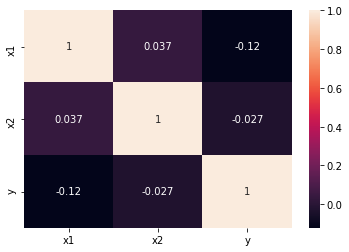

In [14]:
sns.heatmap(df.corr(), annot=True)
plt.show()

No handles with labels found to put in legend.


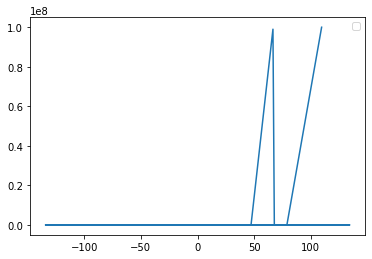

In [15]:
# plt.scatter('x1', 'x2',data=df)
plt.plot(df.x1, df.x2)
plt.legend()
plt.show()

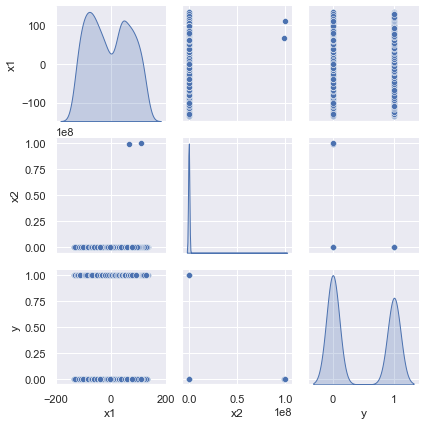

In [16]:

sns.set()
columns = ['x1','x2','y']
sns.pairplot(df[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

<AxesSubplot:xlabel='x1'>

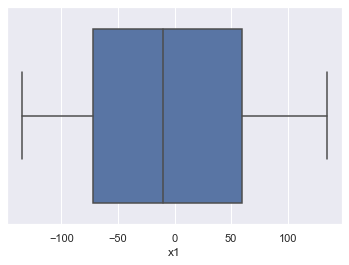

In [17]:
sns.boxplot(x=df['x1'])

<AxesSubplot:xlabel='x2'>

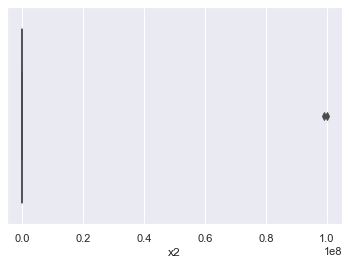

In [18]:
sns.boxplot(x=df['x2'])

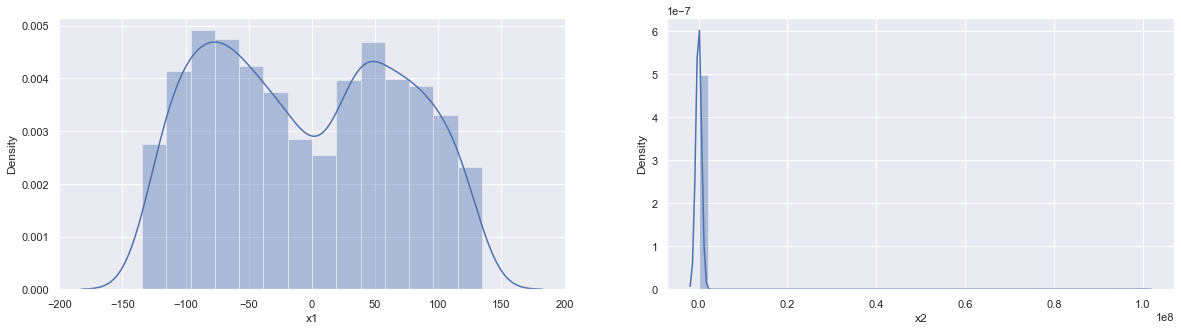

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df['x1'])
plt.subplot(1,2,2)
sns.distplot(df['x2'])
plt.show()

In [20]:
q1,q3=np.percentile(df.x2,[25,75])
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
lb,ub

(-296.5058689975, 280.1506946225)

In [21]:
df[df['x2'] > ub]
# df[df['x2'] < lb]

,x1,x2,y
1541,66.63,99009998.00,0
2226,109.62,99999999.00,0


In [22]:
df.loc[df['x2']>=ub,'x2']=ub

In [23]:
df.shape

(2227, 3)

In [24]:
X=df.iloc[:,:2]
y=df.y

In [25]:
X.shape, y.shape

((2227, 2), (2227,))

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## Logistic Regression

In [218]:
log = LogisticRegression()
log.fit(X_train_sc,y_train)

LogisticRegression()

In [219]:
log.score(X_test_sc,y_test)

0.7354260089686099

In [220]:
log_pred = log.predict(X_test_sc)

In [221]:
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))

[[361   5]
 [172 131]]
              precision    recall  f1-score   support

           0       0.68      0.99      0.80       366
           1       0.96      0.43      0.60       303

    accuracy                           0.74       669
   macro avg       0.82      0.71      0.70       669
weighted avg       0.81      0.74      0.71       669



## SVM with Linear Kernel

In [224]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_sc, y_train)
y_pred = svclassifier.predict(X_test_sc)

In [225]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7369207772795217
[[366   0]
 [176 127]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       366
           1       1.00      0.42      0.59       303

    accuracy                           0.74       669
   macro avg       0.84      0.71      0.70       669
weighted avg       0.82      0.74      0.71       669



## SVM with RBF Kernel

In [226]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train_sc, y_train)
y_pred = svclassifier.predict(X_test_sc)

In [227]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9566517189835575
[[355  11]
 [ 18 285]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       366
           1       0.96      0.94      0.95       303

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



## Decision Tree

In [81]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=6, min_samples_leaf=5)   
clf_model.fit(X_train_sc,y_train)
y_pred = clf_model.predict(X_test_sc)


In [82]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9641255605381166
[[352  14]
 [ 10 293]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       366
           1       0.95      0.97      0.96       303

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



## KNN

In [234]:
k_range=range(2,30)
scores = {}
scores_list=[]
  
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores[k]=accuracy_score(y_test,y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))


In [235]:
scores

{2: 0.9417040358744395,
 3: 0.9491778774289985,
 4: 0.9461883408071748,
 5: 0.9566517189835575,
 6: 0.953662182361734,
 7: 0.9521674140508222,
 8: 0.9551569506726457,
 9: 0.9506726457399103,
 10: 0.9566517189835575,
 11: 0.9566517189835575,
 12: 0.953662182361734,
 13: 0.9566517189835575,
 14: 0.9596412556053812,
 15: 0.9596412556053812,
 16: 0.9626307922272048,
 17: 0.9626307922272048,
 18: 0.9596412556053812,
 19: 0.9626307922272048,
 20: 0.9611360239162929,
 21: 0.9611360239162929,
 22: 0.9596412556053812,
 23: 0.9566517189835575,
 24: 0.9596412556053812,
 25: 0.9611360239162929,
 26: 0.9626307922272048,
 27: 0.9611360239162929,
 28: 0.9626307922272048,
 29: 0.9596412556053812}

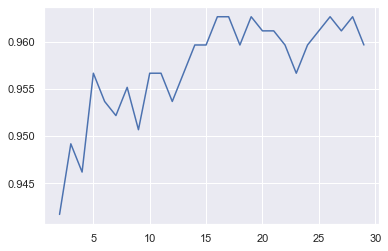

In [236]:
# plt.scatter(K, training, color ='k')
# plt.scatter(K, test, color ='g')
plt.plot(k_range,scores_list)
plt.show()

In [238]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [239]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9626307922272048
[[357   9]
 [ 16 287]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       366
           1       0.97      0.95      0.96       303

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



## Comparing Models

In [29]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_sc, X_test_sc, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  9.35it/s]


In [30]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.96,0.96,0.96,0.96,0.42
LabelPropagation,0.96,0.96,0.96,0.96,0.24
LGBMClassifier,0.96,0.96,0.96,0.96,0.16
SVC,0.96,0.96,0.96,0.96,0.05
QuadraticDiscriminantAnalysis,0.96,0.95,0.95,0.96,0.03
KNeighborsClassifier,0.95,0.95,0.95,0.95,0.09
RandomForestClassifier,0.95,0.95,0.95,0.95,0.44
BaggingClassifier,0.95,0.95,0.95,0.95,0.08
ExtraTreesClassifier,0.94,0.95,0.95,0.94,0.30
